In [15]:
%matplotlib inline

import json
import math
import matplotlib.pyplot as plt

# filename = 'usdt_eth_01022016.json'
starting_position = 0
starting_balance = 1000
initial_risk = 0.5
risk_threshold_buy = 0.3
risk_threshold_sell = 0.8

class Ticker:
    def __init__(self, popen, pclose, phigh, plow):
        self.open = popen
        self.close = pclose
        self.high = phigh
        self.low = plow

    def price(self):
        return (self.open + self.close + self.high + self.close) / 4

In [33]:
filename = 'usdt_eth_01122016.json'
data = []
tickers = []
xs = []
risks = []
xs = []
risk = initial_risk
balance = starting_balance
position = starting_position
with open(filename, 'r') as f:
    data = json.load(f)
    print 'total number of tickers {}'.format(len(data))
    for i in data:
        ticker = Ticker(i['open'], i['close'], i['high'], i['low'])
        tickers.append(ticker)
        x = ticker.close * 1.0 / ticker.open
        xs.append(x)
        if x > 1:
            risk = risk + (1 - risk) / (math.e - 1) * (math.pow(1 + 1.0 / x, x - 1) - 1)
        elif x < 1:
            risk = risk / math.log(2) * math.log(1 + x)
        # buy more if risk of going up is high
        if risk <= risk_threshold_buy and balance > 0:
            # poloniex fee is 0.15% for maker
            amount = balance * 1.0 / (ticker.price() * 1.15)
            position += amount
            # reset balance for ease of calculation
            balance = 0
            print 'enter, price = {} => position = {}'.format(ticker.price(), position)
        elif risk >= risk_threshold_sell and position > 0:
            amount = position * ticker.price() * 0.9975
            balance += amount
            position = 0
            print 'exit, price = {} => balance = {}'.format(ticker.price(), balance)
        risks.append(risk)
        
# if at the end we have coins left, convert into money
if position > 0:
    balance = position * tickers[-1].price() * 0.9975
baseline = tickers[-1].price() * 100. / tickers[0].price()
print 'base line performance {}% (initial_price = {}, final_price = {})'.format(baseline, tickers[0].price(), tickers[-1].price())
print 'final balance = {}'.format(balance)
print 'profit = {}%'.format(balance * 100. / starting_balance)

total number of tickers 204769
enter, price = 2.68269919 => position = 324.138174206
base line performance 60838.8345784% (initial_price = 0.92082835, final_price = 560.221236608)
final balance = 181135.116064
profit = 18113.5116064%


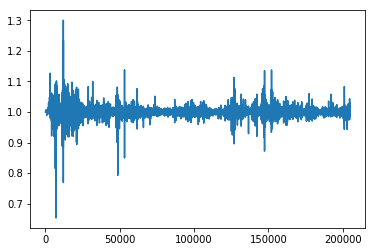

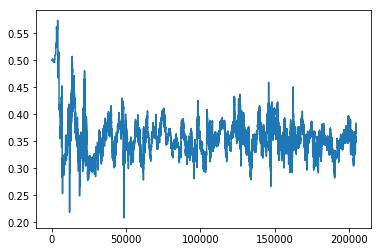

In [25]:
plt.figure()
plt.plot(range(len(xs)), xs)
plt.figure()
plt.plot(range(len(risks)), risks)
plt.show()